<a href="https://colab.research.google.com/github/Ekene-Ebenezer/Gomycode-Data-Science/blob/main/Superverised_learning_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Load Data

In [1]:
import pandas as pd

df = pd.read_csv('/content/5G_energy_consumption_dataset (1).csv')
df

,Time,BS,Energy,load,ESMODE,TXpower
0,20230101 010000,B_0,64.275037,0.487936,0.0,7.101719
1,20230101 020000,B_0,55.904335,0.344468,0.0,7.101719
2,20230101 030000,B_0,57.698057,0.193766,0.0,7.101719
3,20230101 040000,B_0,55.156951,0.222383,0.0,7.101719
4,20230101 050000,B_0,56.053812,0.175436,0.0,7.101719
...,...,...,...,...,...,...
92624,20230102 170000,B_1018,14.648729,0.087538,0.0,7.325859
92625,20230102 180000,B_1018,14.648729,0.082635,0.0,7.325859
92626,20230102 210000,B_1018,13.452915,0.055538,0.0,7.325859
92627,20230102 220000,B_1018,13.602392,0.058077,0.0,7.325859


**Data** **Preparation**

Data Cleaning

In [2]:
df.drop_duplicates

<bound method DataFrame.drop_duplicates of                   Time      BS     Energy      load  ESMODE   TXpower
0      20230101 010000     B_0  64.275037  0.487936     0.0  7.101719
1      20230101 020000     B_0  55.904335  0.344468     0.0  7.101719
2      20230101 030000     B_0  57.698057  0.193766     0.0  7.101719
3      20230101 040000     B_0  55.156951  0.222383     0.0  7.101719
4      20230101 050000     B_0  56.053812  0.175436     0.0  7.101719
...                ...     ...        ...       ...     ...       ...
92624  20230102 170000  B_1018  14.648729  0.087538     0.0  7.325859
92625  20230102 180000  B_1018  14.648729  0.082635     0.0  7.325859
92626  20230102 210000  B_1018  13.452915  0.055538     0.0  7.325859
92627  20230102 220000  B_1018  13.602392  0.058077     0.0  7.325859
92628  20230102 230000  B_1018  13.303438  0.048173     0.0  7.325859

[92629 rows x 6 columns]>

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92629 entries, 0 to 92628
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Time     92629 non-null  object 
 1   BS       92629 non-null  object 
 2   Energy   92629 non-null  float64
 3   load     92629 non-null  float64
 4   ESMODE   92629 non-null  float64
 5   TXpower  92629 non-null  float64
dtypes: float64(4), object(2)
memory usage: 4.2+ MB


In [4]:
print (df.head())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719


In [5]:
print (df.describe ())

             Energy          load        ESMODE       TXpower
count  92629.000000  92629.000000  92629.000000  92629.000000
mean      28.138997      0.244705      0.081361      6.765427
std       13.934645      0.234677      0.382317      0.309929
min        0.747384      0.000000      0.000000      5.381166
25%       18.236173      0.057370      0.000000      6.427504
50%       24.065770      0.165550      0.000000      6.875934
75%       35.724963      0.363766      0.000000      6.875934
max      100.000000      0.993957      4.000000      8.375336


In [6]:
print(df.isnull().sum())

Time       0
BS         0
Energy     0
load       0
ESMODE     0
TXpower    0
dtype: int64


In [7]:
df_no_duplicates = df.drop_duplicates()
print (df_no_duplicates.head())

              Time   BS     Energy      load  ESMODE   TXpower
0  20230101 010000  B_0  64.275037  0.487936     0.0  7.101719
1  20230101 020000  B_0  55.904335  0.344468     0.0  7.101719
2  20230101 030000  B_0  57.698057  0.193766     0.0  7.101719
3  20230101 040000  B_0  55.156951  0.222383     0.0  7.101719
4  20230101 050000  B_0  56.053812  0.175436     0.0  7.101719


In [8]:
 # Import label encoder
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
# Encode labels in categorical columms
df['BS']= label_encoder.fit_transform(df['BS'])

Data Spiliting

In [9]:
X = df.drop(["Time",'Energy'], axis=1 )
X

,BS,load,ESMODE,TXpower
0,0,0.487936,0.0,7.101719
1,0,0.344468,0.0,7.101719
2,0,0.193766,0.0,7.101719
3,0,0.222383,0.0,7.101719
4,0,0.175436,0.0,7.101719
...,...,...,...,...
92624,10,0.087538,0.0,7.325859
92625,10,0.082635,0.0,7.325859
92626,10,0.055538,0.0,7.325859
92627,10,0.058077,0.0,7.325859


In [10]:
y = df['Energy']
y

0        64.275037
1        55.904335
2        57.698057
3        55.156951
4        56.053812
           ...    
92624    14.648729
92625    14.648729
92626    13.452915
92627    13.602392
92628    13.303438
Name: Energy, Length: 92629, dtype: float64

In [11]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=100)

In [12]:
x_train

,BS,load,ESMODE,TXpower
63549,533,0.034620,0.000000,6.427504
36105,259,0.064800,0.000000,6.427504
16256,59,0.311160,0.000000,6.427504
67275,571,0.388883,0.000000,6.875934
11441,13,0.037440,0.000000,6.427504
...,...,...,...,...
65615,553,0.215870,0.000000,7.100897
77655,674,0.011300,1.896944,6.875934
79683,695,0.295630,0.000000,6.875934
56088,460,0.070530,0.000000,7.100897


In [13]:
y_test

75490    17.339312
42274    17.638266
49027    13.751868
5576     25.710015
50777    24.962631
           ...    
88383    14.200299
1783     38.266069
14013    31.240658
67916    39.162930
62399    15.545590
Name: Energy, Length: 18526, dtype: float64

Model Building

linear regression

In [14]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(x_train, y_train)

LinearRegression()

Applying the model to make a predication

In [15]:
y_lr_train_pred = lr.predict(x_train)
y_lr_test_pred = lr.predict(x_test)

In [16]:
y_lr_train_pred

array([16.30496207, 17.94246507, 26.22390514, ..., 31.38797724,
       28.49771977, 23.94506478])

In [17]:
y_lr_test_pred

array([22.77289731, 24.36466773, 25.61016096, ..., 28.12500374,
       47.51288724,  6.65339742])

Evalute model performance

In [18]:
from sklearn.metrics import mean_squared_error, r2_score
lr_train_r2 = r2_score(y_train, y_lr_train_pred)

lr_test_mse = mean_squared_error(y_test, y_lr_test_pred)
lr_test_r2 = r2_score(y_test, y_lr_test_pred)

Data visualization of predication result

[]

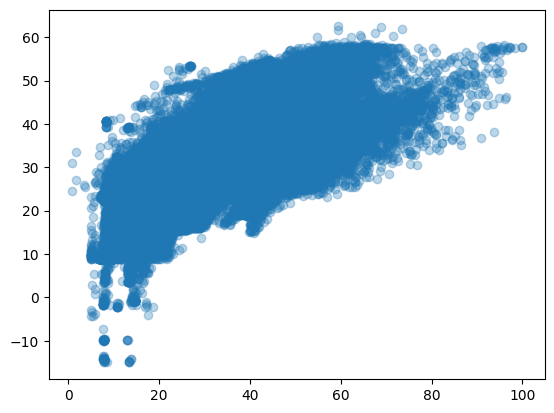

In [24]:
import matplotlib.pyplot as plt
plt.scatter(x=y_train, y=y_lr_train_pred, alpha=0.3)
plt.plot()